###  Autoencoder: denoising images

Removing noise from images.

In [1]:
import torch
import torch.cuda as cuda
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import os
import glob

from torch.autograd import Variable


from torchvision import datasets
from torchvision import transforms

from torch.nn import functional as F

In [2]:
DATA_DIR = './data/'

In [3]:
os.listdir(DATA_DIR)

['train', 'val']

In [4]:
trn_dir = f'{DATA_DIR}train'
val_dir = f'{DATA_DIR}val'

In [5]:
os.listdir(trn_dir)

['bees', 'ants']

In [6]:
trn_fnames = glob.glob(f'{trn_dir}/*/*.jpg')
trn_fnames[:5]

['./data/train/bees/2467959963_a7831e9ff0.jpg',
 './data/train/bees/3006264892_30e9cced70.jpg',
 './data/train/bees/2707440199_cd170bd512.jpg',
 './data/train/bees/2781170484_5d61835d63.jpg',
 './data/train/bees/196658222_3fffd79c67.jpg']

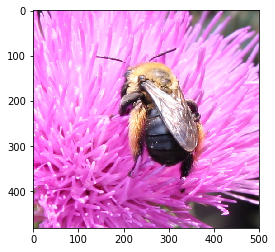

In [7]:
img = plt.imread(trn_fnames[2])
plt.imshow(img);

In [8]:
sz = 32
tfms = transforms.Compose([
    transforms.Resize((sz, sz)),  
    transforms.ToTensor(),        # Tensor
])

train_ds = datasets.ImageFolder(trn_dir, transform=tfms)
val_ds = datasets.ImageFolder(val_dir, transform=tfms)

**Utility to display the original, noisy and denoised image**

In [9]:
def show_img(orig, noisy, denoised):
    fig=plt.figure()
    
    orig = orig.swapaxes(0, 1).swapaxes(1, 2)
    noisy = noisy.swapaxes(0, 1).swapaxes(1, 2)
    denoised = denoised.swapaxes(0, 1).swapaxes(1, 2)
    
    # Normalize for display purpose
    orig     = (orig - orig.min()) / (orig.max() - orig.min())
    noisy    = (noisy - noisy.min()) / (noisy.max() - noisy.min())
    denoised = (denoised - denoised.min()) / (denoised.max() - denoised.min())
    
    fig.add_subplot(1, 3, 1, title='Original')
    plt.imshow(orig)
    
    fig.add_subplot(1, 3, 2, title='Noisy')
    plt.imshow(noisy)
    
    fig.add_subplot(1, 3, 3, title='Denoised')
    plt.imshow(denoised)
    
    fig.subplots_adjust(wspace = 0.5)
    plt.show()
    
# To test
# show_img(cifar10_train[0][0].numpy(), cifar10_train[1][0].numpy(), cifar10_train[2][0].numpy())

**Some hyper parameters**

In [10]:
batch_size = 16 # Reduce this if you get out-of-memory error
learning_rate = 0.001
noise_level = 0.1

**Create the dataloader**

In [11]:
train_dl = torch.utils.data.DataLoader(train_ds, batch_size=batch_size, shuffle=True, num_workers=4)
valid_dl = torch.utils.data.DataLoader(val_ds, batch_size=batch_size, shuffle=True, num_workers=4)

**The Denoising Autoencoder**

In [12]:
class DenoisingAutoencoder(nn.Module):
    
    def __init__(self):
    
        super(DenoisingAutoencoder, self).__init__()
                                                            # 32 x 32 x 3 (input)

        self.conv1e = nn.Conv2d(3, 24, 3, padding=2)        # 30 x 30 x 24
        self.conv2e = nn.Conv2d(24, 48, 3, padding=2)       # 28 x 28 x 48
        self.conv3e = nn.Conv2d(48, 96, 3, padding=2)       # 26 x 26 x 96
        self.conv4e = nn.Conv2d(96, 128, 3, padding=2)      # 24 x 24 x 128
        self.conv5e = nn.Conv2d(128, 256, 3, padding=2)     # 22 x 22 x 256
        self.mp1e   = nn.MaxPool2d(2, return_indices=True)  # 11 x 11 x 256

        self.mp1d = nn.MaxUnpool2d(2)
        self.conv5d = nn.ConvTranspose2d(256, 128, 3, padding=2)
        self.conv4d = nn.ConvTranspose2d(128, 96, 3, padding=2)
        self.conv3d = nn.ConvTranspose2d(96, 48, 3, padding=2)
        self.conv2d = nn.ConvTranspose2d(48, 24, 3, padding=2)
        self.conv1d = nn.ConvTranspose2d(24, 3, 3, padding=2)
        
    
    def forward(self, x):
        # Encoder
        x = self.conv1e(x)
        x = F.relu(x)
        x = self.conv2e(x)
        x = F.relu(x)
        x = self.conv3e(x)
        x = F.relu(x)
        x = self.conv4e(x)
        x = F.relu(x)
        x = self.conv5e(x)
        x = F.relu(x)
        x, i = self.mp1e(x)
        
         # Decoder
        x = self.mp1d(x, i)
        x = self.conv5d(x)
        x = F.relu(x)
        x = self.conv4d(x)
        x = F.relu(x)
        x = self.conv3d(x)
        x = F.relu(x)
        x = self.conv2d(x)
        x = F.relu(x)
        x = self.conv1d(x)
        x = F.relu(x)
        
        return x


In [13]:
autoencoder = DenoisingAutoencoder().cuda()
parameters = list(autoencoder.parameters())
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(parameters, lr=learning_rate)

Iteration  1


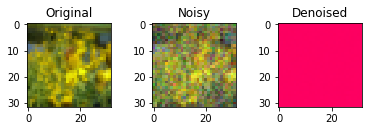

Iteration  2


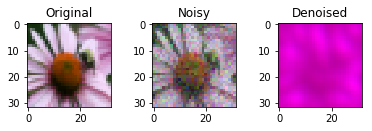

Iteration  3


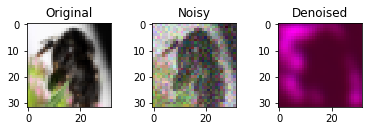

Iteration  4


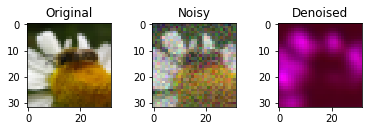

Iteration  5


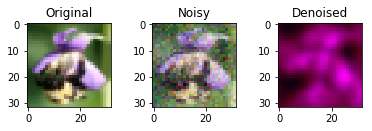

Iteration  6


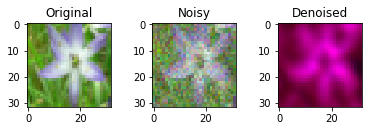

Iteration  7


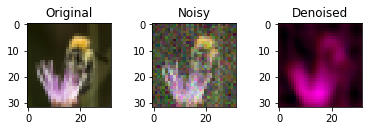

Iteration  8


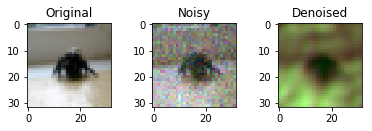

Iteration  9


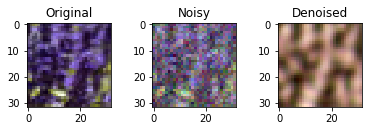

Iteration  10


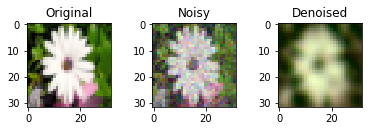

Iteration  11


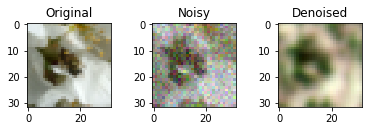

Iteration  12


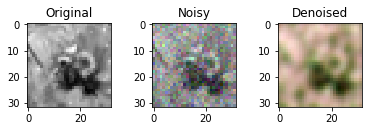

Iteration  13


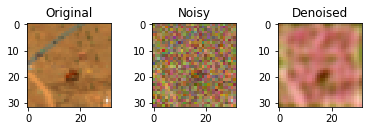

Iteration  14


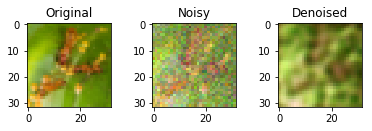

Iteration  15


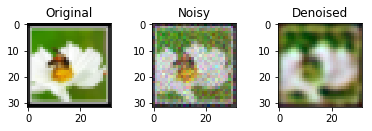

Iteration  16


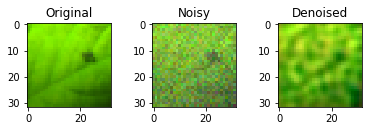

Iteration  17


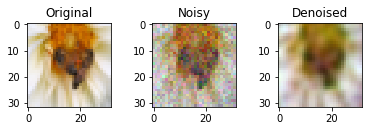

Iteration  18


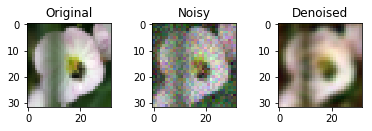

Iteration  19


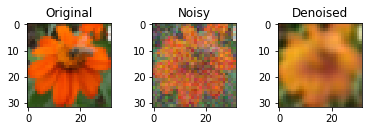

Iteration  20


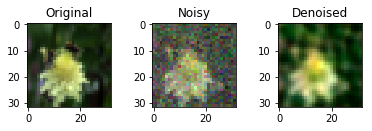

Iteration  21


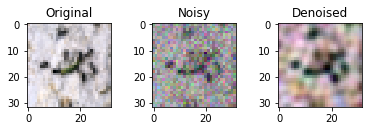

Iteration  22


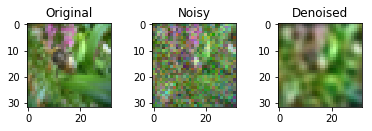

Iteration  23


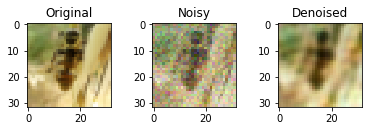

Iteration  24


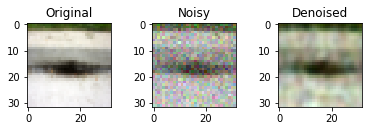

Iteration  25


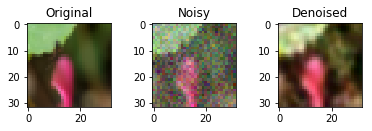

Iteration  26


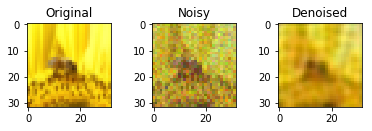

Iteration  27


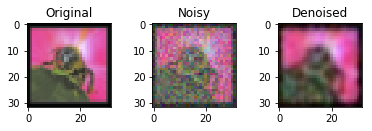

Iteration  28


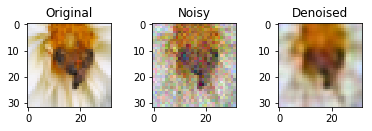

Iteration  29


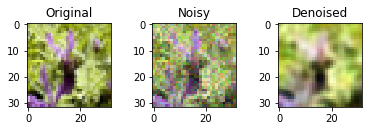

Iteration  30


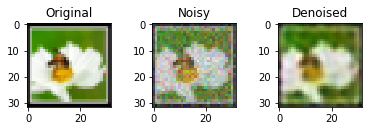

Iteration  31


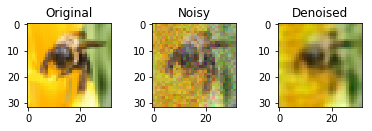

Iteration  32


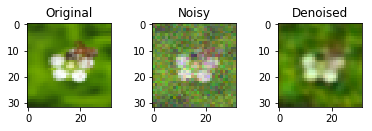

Iteration  33


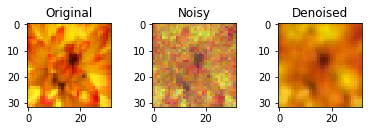

Iteration  34


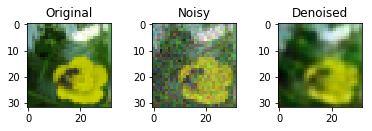

Iteration  35


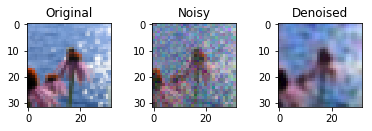

Iteration  36


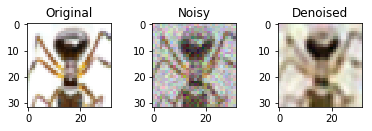

Iteration  37


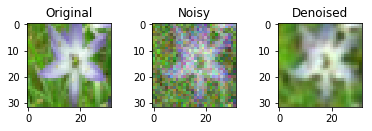

Iteration  38


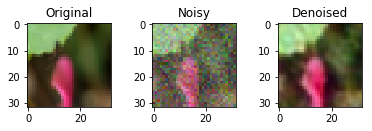

Iteration  39


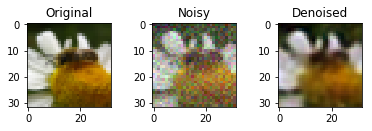

Iteration  40


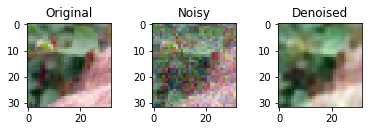

Iteration  41


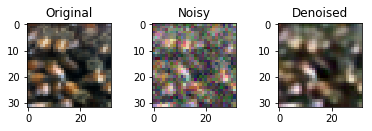

Iteration  42


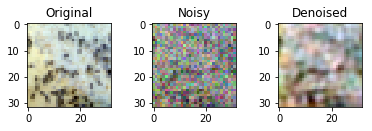

Iteration  43


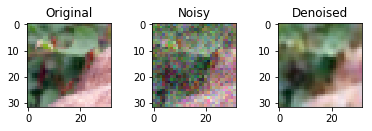

Iteration  44


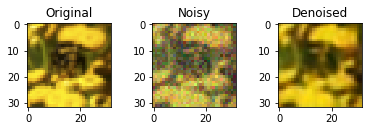

Iteration  45


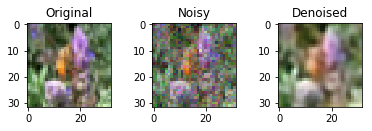

Iteration  46


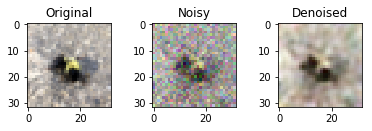

Iteration  47


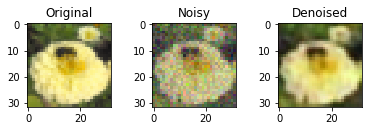

Iteration  48


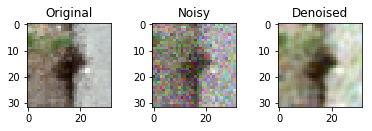

Iteration  49


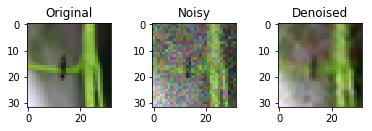

Iteration  50


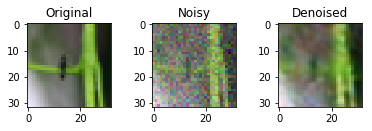

Iteration  51


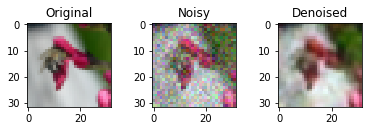

Iteration  52


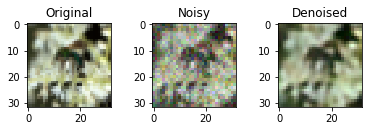

Iteration  53


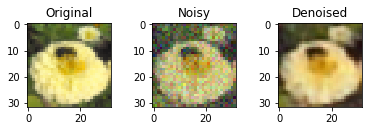

Iteration  54


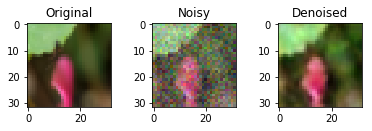

Iteration  55


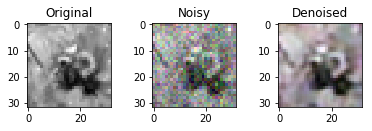

Iteration  56


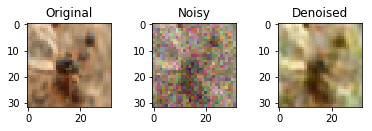

Iteration  57


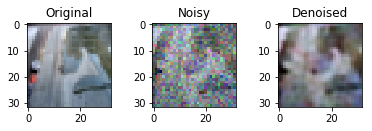

Iteration  58


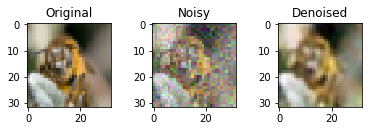

Iteration  59


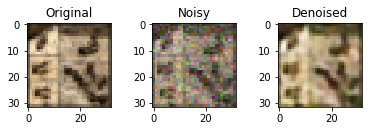

Iteration  60


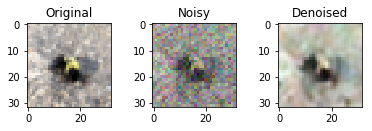

Iteration  61


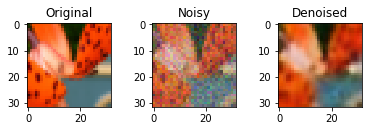

Iteration  62


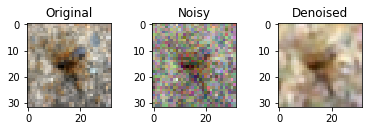

Iteration  63


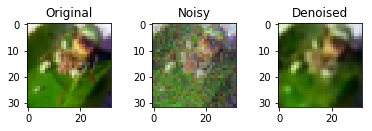

Iteration  64


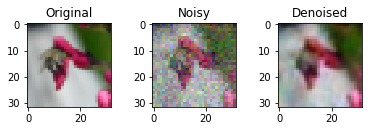

Iteration  65


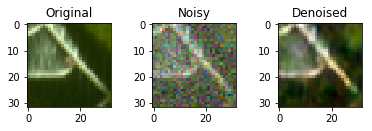

Iteration  66


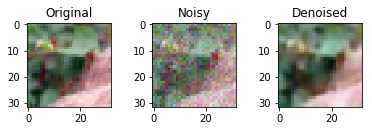

Iteration  67


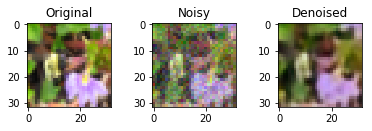

Iteration  68


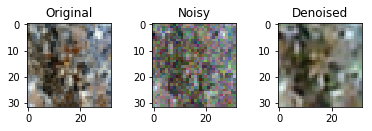

Iteration  69


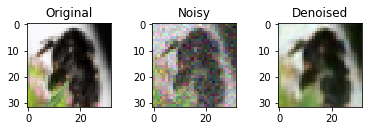

Iteration  70


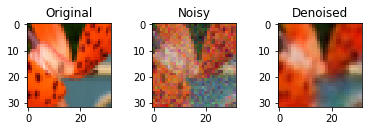

Iteration  71


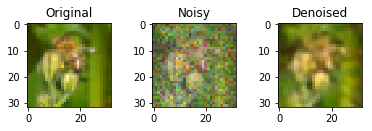

Iteration  72


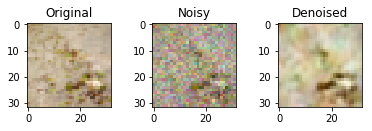

Iteration  73


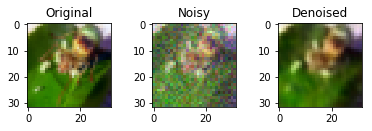

Iteration  74


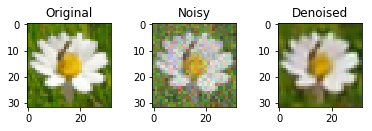

Iteration  75


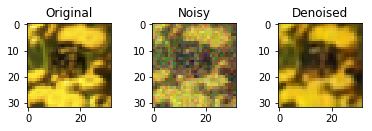

Iteration  76


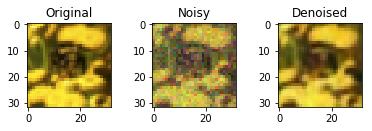

Iteration  77


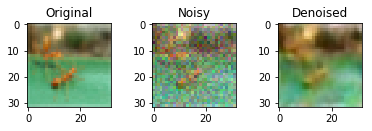

Iteration  78


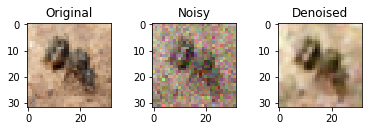

Iteration  79


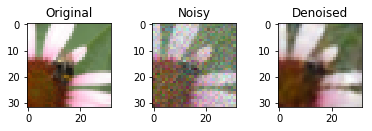

Iteration  80


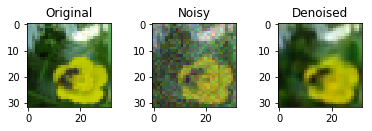

Iteration  81


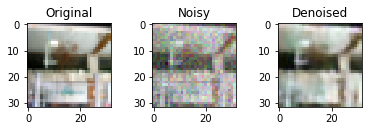

Iteration  82


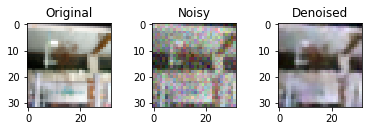

Iteration  83


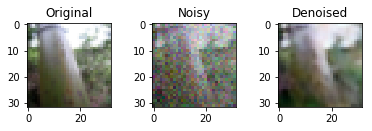

Iteration  84


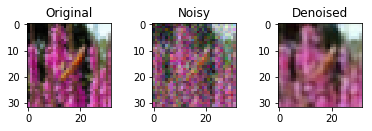

Iteration  85


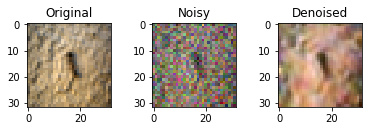

Iteration  86


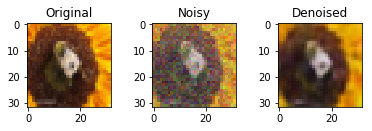

Iteration  87


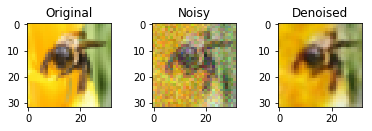

Iteration  88


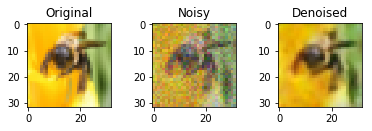

Iteration  89


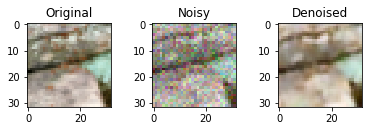

Iteration  90


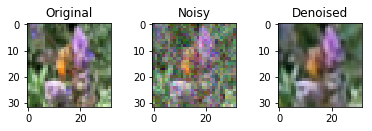

Iteration  91


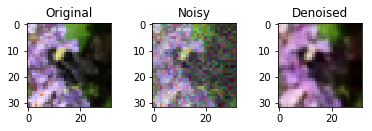

Iteration  92


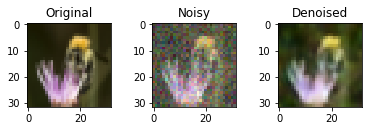

Iteration  93


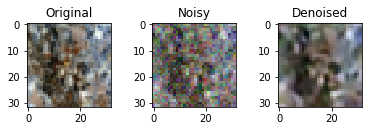

Iteration  94


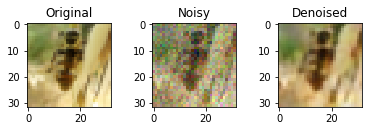

Iteration  95


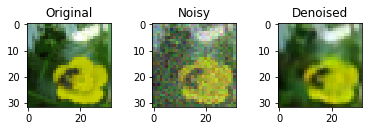

Iteration  96


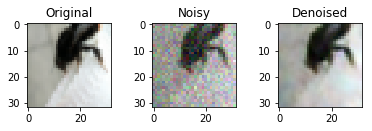

Iteration  97


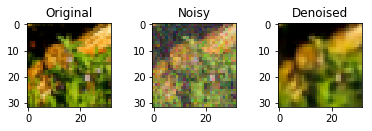

Iteration  98


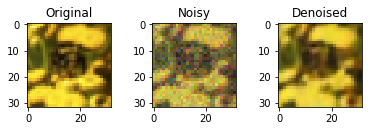

Iteration  99


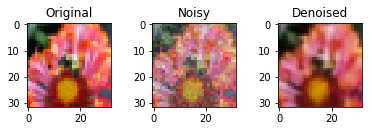

Iteration  100


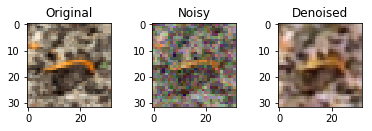

Iteration  101


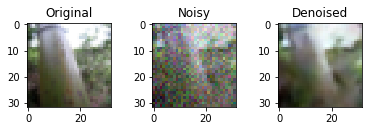

Iteration  102


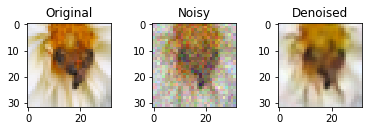

Iteration  103


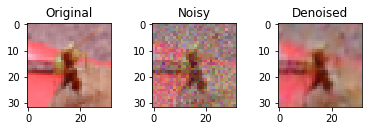

Iteration  104


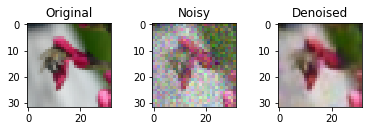

Iteration  105


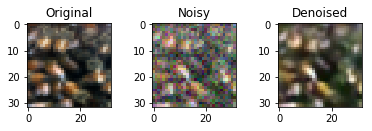

Iteration  106


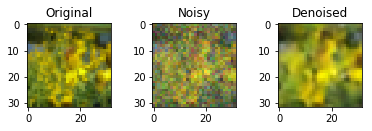

Iteration  107


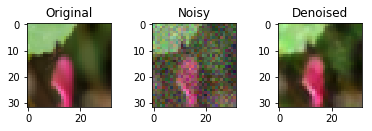

Iteration  108


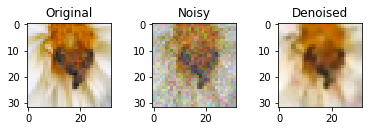

Iteration  109


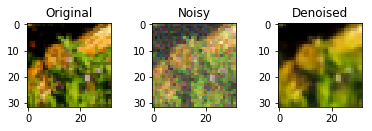

Iteration  110


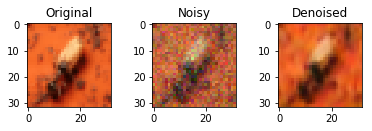

Iteration  111


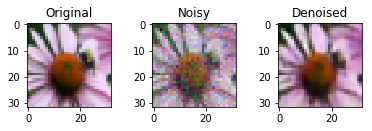

Iteration  112


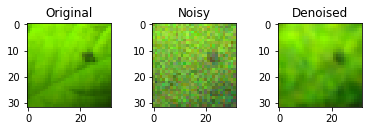

Iteration  113


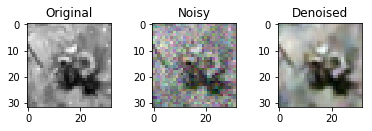

Iteration  114


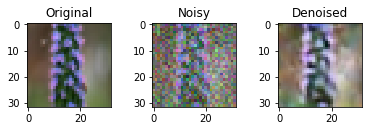

Iteration  115


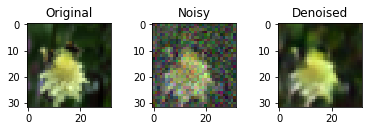

Iteration  116


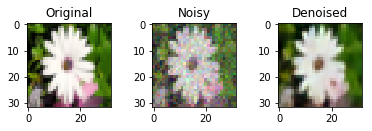

Iteration  117


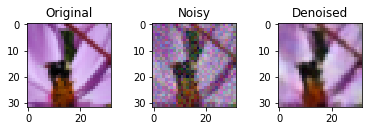

Iteration  118


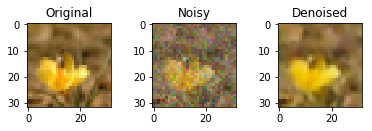

Iteration  119


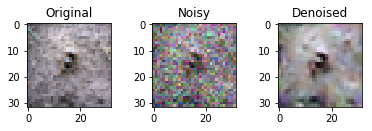

Iteration  120


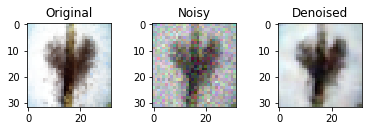

Iteration  121


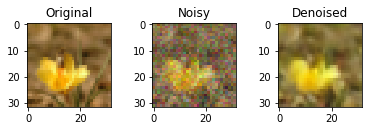

Iteration  122


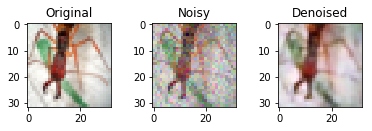

Iteration  123


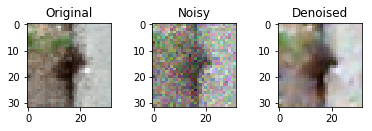

Iteration  124


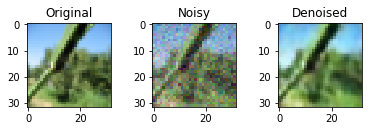

Iteration  125


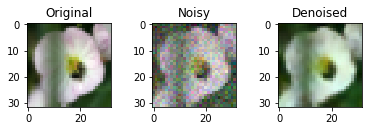

Iteration  126


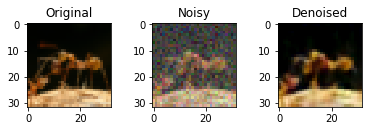

Iteration  127


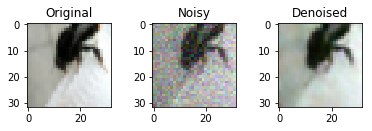

Iteration  128


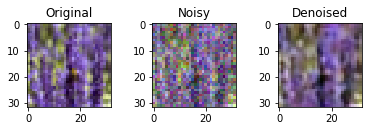

Iteration  129


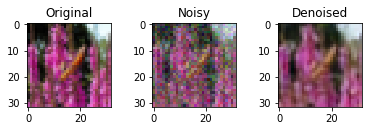

Iteration  130


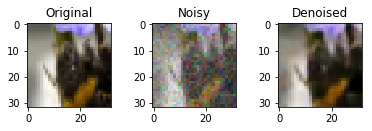

Iteration  131


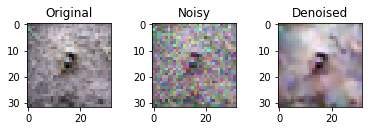

Iteration  132


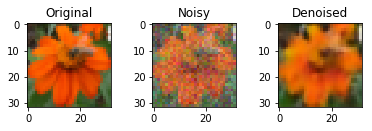

Iteration  133


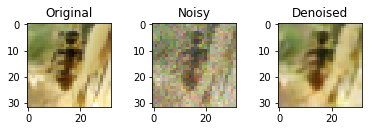

Iteration  134


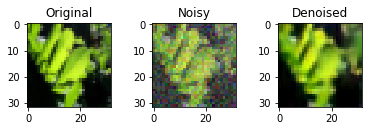

Iteration  135


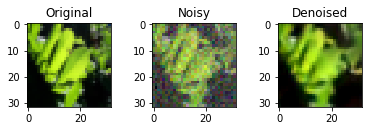

Iteration  136


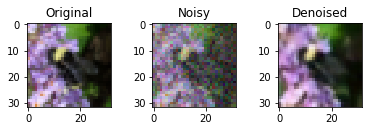

Iteration  137


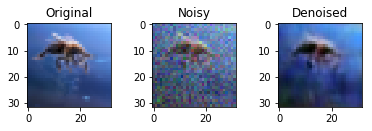

Iteration  138


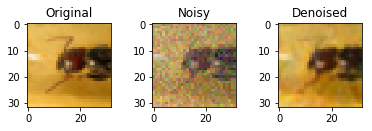

Iteration  139


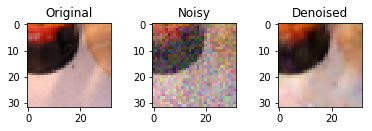

Iteration  140


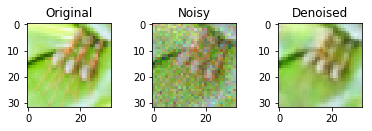

Iteration  141


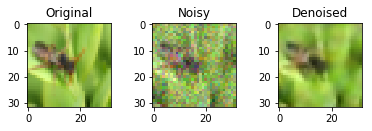

Iteration  142


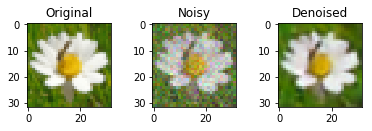

Iteration  143


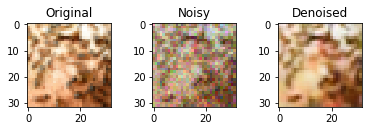

Iteration  144


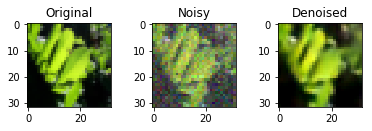

Iteration  145


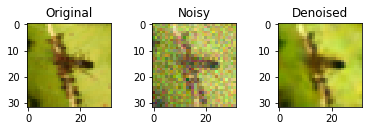

Iteration  146


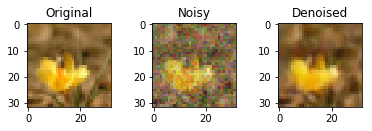

Iteration  147


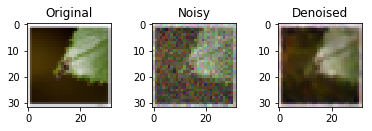

Iteration  148


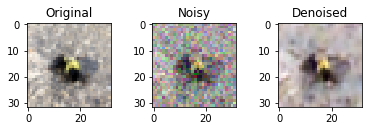

Iteration  149


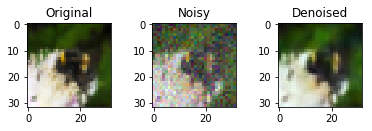

Iteration  150


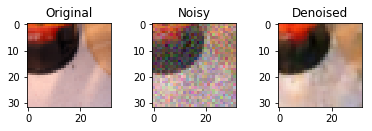

Iteration  151


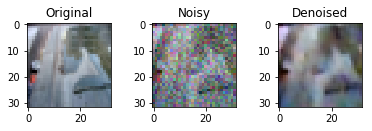

Iteration  152


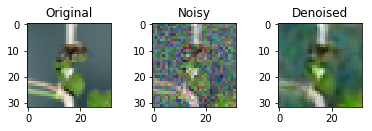

Iteration  153


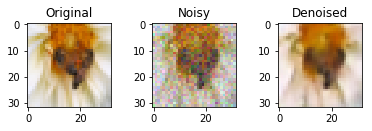

Iteration  154


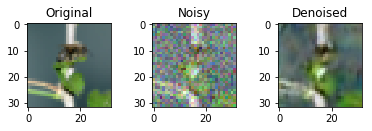

Iteration  155


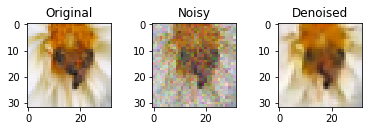

Iteration  156


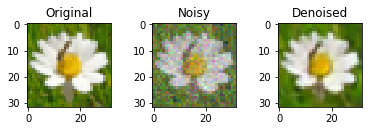

Iteration  157


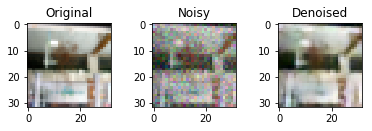

Iteration  158


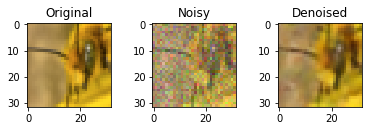

Iteration  159


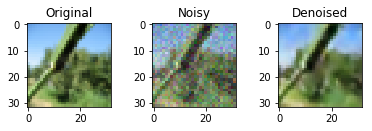

Iteration  160


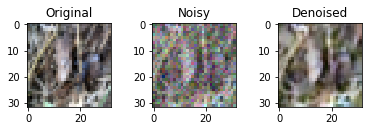

Iteration  161


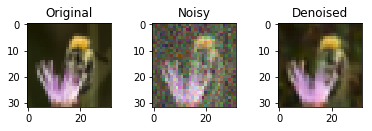

Iteration  162


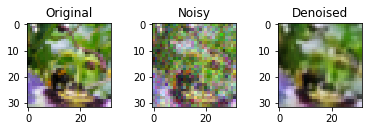

Iteration  163


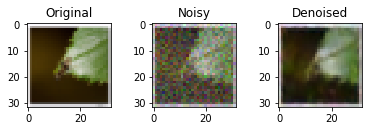

Iteration  164


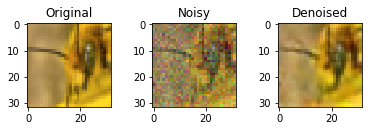

Iteration  165


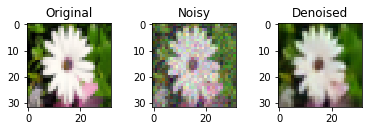

Iteration  166


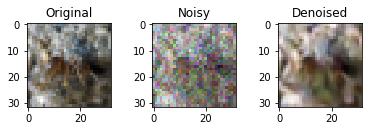

Iteration  167


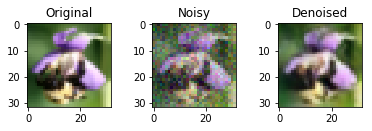

Iteration  168


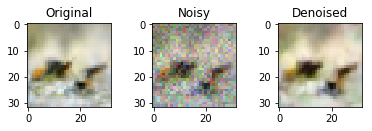

Iteration  169


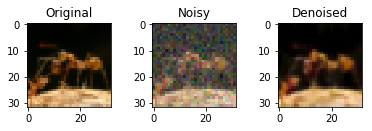

Iteration  170


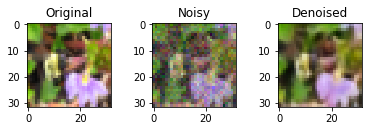

Iteration  171


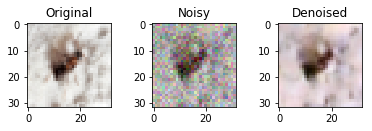

Iteration  172


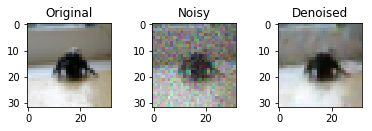

Iteration  173


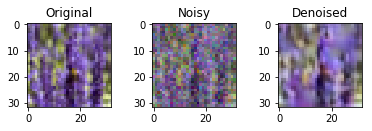

Iteration  174


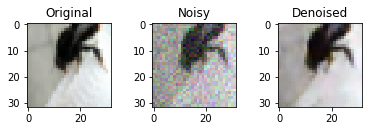

Iteration  175


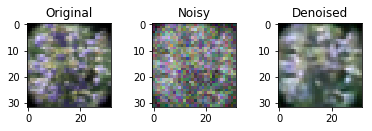

Iteration  176


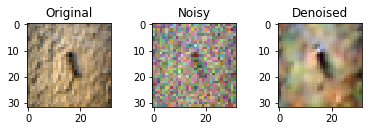

Iteration  177


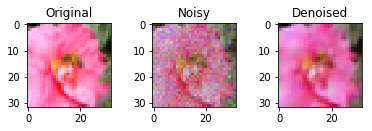

Iteration  178


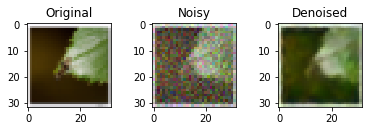

Iteration  179


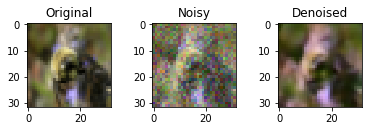

Iteration  180


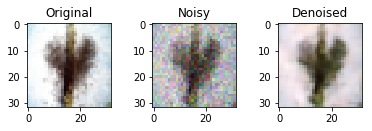

Iteration  181


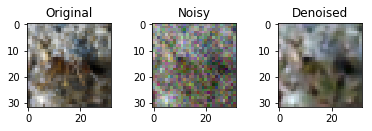

Iteration  182


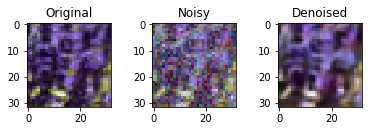

Iteration  183


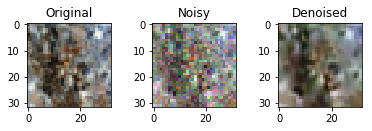

Iteration  184


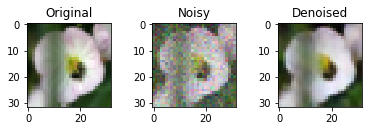

Iteration  185


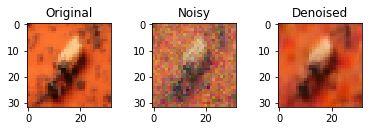

Iteration  186


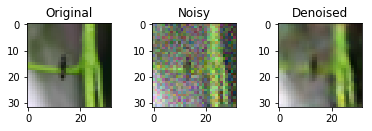

Iteration  187


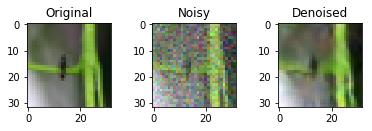

Iteration  188


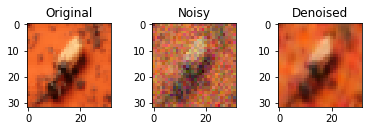

Iteration  189


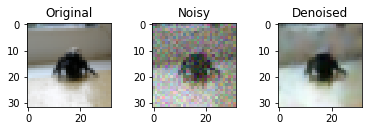

Iteration  190


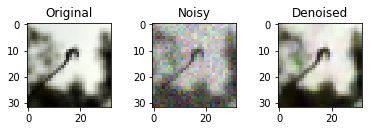

Iteration  191


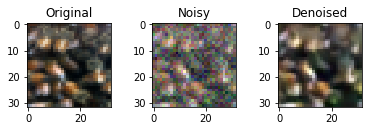

Iteration  192


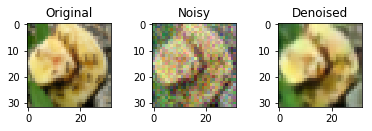

Iteration  193


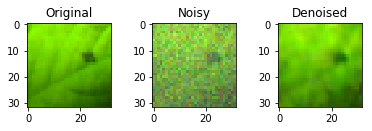

Iteration  194


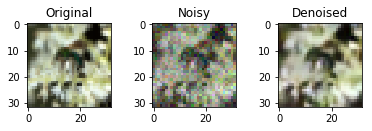

Iteration  195


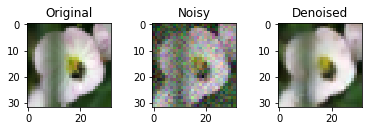

Iteration  196


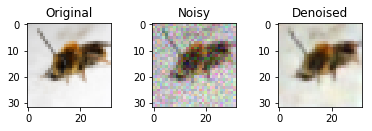

Iteration  197


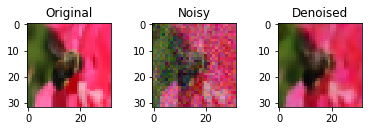

Iteration  198


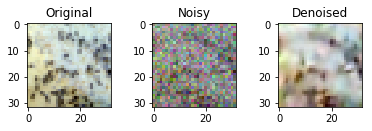

Iteration  199


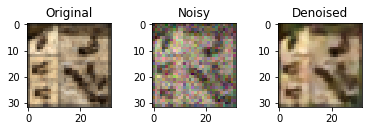

Iteration  200


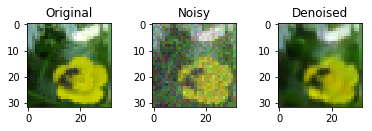

In [14]:
train_loss = []
valid_loss = []

# epoc size
for i in range(200):
    
    # Let's train the model
    
    total_loss = 0.0
    total_iter = 0
    autoencoder.train()
    for image, label in train_dl:
        
        noise = torch.randn(image.shape[0], 3, sz, sz) * noise_level
        image_n = torch.add(image, noise)
        
        image = Variable(image).cuda()
        image_n = Variable(image_n).cuda()

        optimizer.zero_grad()
        output = autoencoder(image_n)
        
        loss = loss_func(output, image)
        loss.backward()
        optimizer.step()
        
        total_iter += 1
        total_loss += loss.data.item()
        
    # Let's record the validation loss
    
    total_val_loss = 0.0
    total_val_iter = 0
    autoencoder.eval()
    for image, label in valid_dl:
        
        noise = torch.randn(image.shape[0], 3, sz, sz) * noise_level
        image_n = torch.add(image, noise)
        
        image = Variable(image).cuda()
        image_n = Variable(image_n).cuda()
        
        output = autoencoder(image_n)
        loss = loss_func(output, image)
        
        total_val_iter += 1
        total_val_loss += loss.data.item()
        
        
    # Let's visualize the first image of the last batch in our validation set
    orig = image[0].cpu()
    noisy = image_n[0].cpu()
    denoised = output[0].cpu()

    orig = orig.data.numpy()
    noisy = noisy.data.numpy()
    denoised = denoised.data.numpy()

    print("Iteration ", i+1)
    show_img(orig, noisy, denoised)
    
    train_loss.append(total_loss / total_iter)
    valid_loss.append(total_val_loss / total_val_iter)
    

In [15]:
# Save the model
torch.save(autoencoder.state_dict(), "./5.autoencoder.pth")

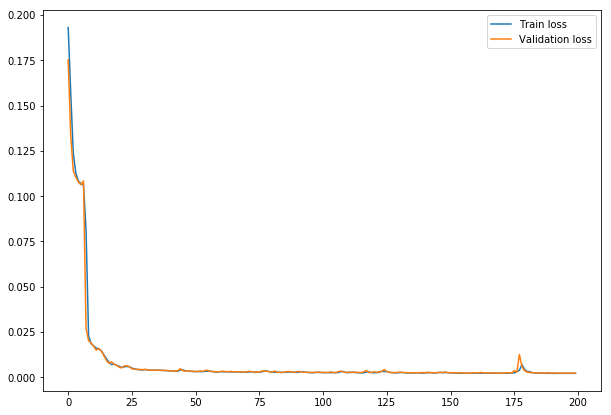

In [16]:
fig = plt.figure(figsize=(10, 7))
plt.plot(train_loss, label='Train loss')
plt.plot(valid_loss, label='Validation loss')
plt.legend()
plt.show()

### Let's do standalone inference

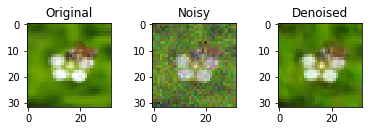

In [25]:
import random

img, _ = random.choice(val_ds)
img    = img.resize_((1, 3, sz, sz))
noise  = torch.randn((1, 3, sz, sz)) * noise_level
img_n  = torch.add(img, noise)

img_n = Variable(img_n).cuda()
denoised = autoencoder(img_n)


show_img(img[0].numpy(), img_n[0].data.cpu().numpy(), denoised[0].data.cpu().numpy())